# Convergence Analysis

In this notebook we will make a convergence analysis. We will investigate the change in statistics of our numerical ensembles when varying the time step $dt$ and the size of the ensamble $N_{ens}$. Our main focus will be on the autocorrelation function $\langle \mathbf{n}(t) \cdot \mathbf{n}(0) \rangle$, and the first two moments $\langle \theta(t) \rangle$ and $\langle \theta^2(t) \rangle$ with emphasis in the stationary reached equilibrium distribution

# Libraries

In [1]:
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
import h5py
import time

In [2]:
config InlineBackend.figure_format ='retina'

# Loading PhD Python Code

In [3]:
run  /Users/adrianovaldesgomez/Repos/PhD-Thesis/py/phd_python_documented_code.py

In [4]:
pwd

'/Users/adrianovaldesgomez/Documents/Adriano_Programming'

In [5]:
mkdir Convergence_Analysis

In [4]:
cd Convergence_Analysis/

/Users/adrianovaldesgomez/Documents/Adriano_Programming/Convergence_Analysis


In [7]:
mkdir Free_Diffusion

In [5]:
cd Free_Diffusion/

/Users/adrianovaldesgomez/Documents/Adriano_Programming/Convergence_Analysis/Free_Diffusion


In [9]:
mkdir Test1

In [6]:
cd Test1/

/Users/adrianovaldesgomez/Documents/Adriano_Programming/Convergence_Analysis/Free_Diffusion/Test1


In [12]:
array_pos_t = np.array(l_rs)
with h5py.File('pos_array.h5', 'w') as hf:
        hf.create_dataset("pos-dataset",  data=array_pos_t)

np.savetxt("Sim_Thetas_t_01.txt", thetas)
#np.savetxt("Last_Config_rs.txt", rs)
print("%s seconds" % (time.time() - start_time))

1019.4542968273163 seconds


In [7]:
def Free_Diff_Sim(D, dt, N_ens, MC_steps, init_dist, exponent):
    start_time = time.time()
    
    if init_dist == 'NP':
        dist_ini = polo_n(N_ens,1.)
    elif init_dist == 'Uniform':
        dist_ini = obs_uniforme(N_ens, 1., 0)
    else:
        dist_ini = init_dist

    rs = dist_ini
    l_rs = [rs]
    thetas = [[0 for i in range(N_ens)]]
    for i in range(MC_steps):
        nuevas_pos = act_n(rs,D,dt)
        #thetas.append(obt_thetas(nuevas_pos))
        rs = nuevas_pos
        l_rs.append(rs)

    array_pos_t = np.array(l_rs)
    
    with h5py.File('pos_array.h5', 'w') as hf:
            hf.create_dataset("pos-ds_D_{}_Odt_{}_N_{}_MC_S_{}".format(D,exponent,N_ens,MC_steps),  data=array_pos_t)

    np.savetxt("Sim_Thetas_t_D_{}_dt_{}_N_{}_MC_S_{}.txt".format(D,exponent,N_ens,MC_steps), thetas)
    #np.savetxt("Last_Config_rs.txt", rs)
    print("%s seconds" % (time.time() - start_time))

NameError: name 'dt' is not defined

In [29]:
Free_Diff_Sim(1*1e-1, 1*np.log(2)*1e-3, 100, 10000, 'NP', '-3')

84.54555916786194 seconds


In [ ]:
l_dt = [np.log(2)*1e-1, np.log(2)*1e-2, np.log(2)*1e-3]

In [15]:
l_N_ens = [100,1000,10000]

In [30]:
ls

Sim_Thetas_t_01.txt
Sim_Thetas_t_D_0.1_dt_-3_N_100_MC_S_10000.txt
Sim_Thetas_t_D_0.1_dt_0.0006931471805599453_N_100_MC_S_10000.txt
pos_array.h5


# Reading HDF5 files

In [8]:
with h5py.File('pos_array.h5', 'r') as hf:
    keys = list(hf.keys())
    data = hf[keys[0]][:]

In [45]:
data

array([[[ 0.00000000e+00,  0.00000000e+00,  1.00000000e+00],
        [ 0.00000000e+00,  0.00000000e+00,  1.00000000e+00],
        [ 0.00000000e+00,  0.00000000e+00,  1.00000000e+00],
        ...,
        [ 0.00000000e+00,  0.00000000e+00,  1.00000000e+00],
        [ 0.00000000e+00,  0.00000000e+00,  1.00000000e+00],
        [ 0.00000000e+00,  0.00000000e+00,  1.00000000e+00]],

       [[ 1.17309591e-02, -2.78514538e-02,  9.99543236e-01],
        [ 5.02881362e-04,  9.92211025e-06,  9.99999874e-01],
        [-4.72478850e-03,  2.36915240e-02,  9.99708151e-01],
        ...,
        [ 9.41567311e-03, -9.22815070e-03,  9.99913089e-01],
        [-6.95847082e-03,  1.38593229e-03,  9.99974829e-01],
        [-6.31465284e-03,  1.66867970e-04,  9.99980048e-01]],

       [[-1.87603850e-02, -6.17170948e-03,  9.99804960e-01],
        [ 1.23007420e-02, -2.13722971e-02,  9.99695912e-01],
        [-6.92047124e-03,  3.08733199e-02,  9.99499347e-01],
        ...,
        [ 9.66263278e-03, -8.90600883e-03,

In [9]:
data.shape

(10001, 100, 3)

In [10]:
l_pos_t = [[v for v in data[i]] for i in range(data.shape[0])]

## We will make an animation

In [48]:
mkdir Animation

In [49]:
cd Animation/

/Users/adrianovaldesgomez/Documents/Adriano_Programming/Convergence_Analysis/Free_Diffusion/Test1/Animation


In [12]:
secuencia = [i*100 for i in range(10000)]
for paso in secuencia:
    choice_indices = np.random.choice(len(l_pos_t[paso]), 100, replace=True)
    choices = [l_pos_t[paso][i] for i in choice_indices]
    plot_particles(choices,0,0,paso,'Free')

IndexError: list index out of range

In [13]:
!mencoder "mf://*.png" -o Free-Diff-Test01.mov -ovc lavc \
-lavcopts vcodec=msmpeg4v2:autoaspect:vbitrate=2160000:mbd=2:\
                keyint=132:vqblur=1.0:cmp=2\:subcmp=2:dia=2:o=mpv_flags=+mv0:last_pred=3 -fps 1 > File_Out.txt 2>&1;

# Several Cases

In [27]:
cd ..

/Users/adrianovaldesgomez/Documents/Adriano_Programming/Convergence_Analysis/Free_Diffusion


In [28]:
mkdir Test3

In [29]:
cd Test3

/Users/adrianovaldesgomez/Documents/Adriano_Programming/Convergence_Analysis/Free_Diffusion/Test3


In [30]:
Free_Diff_Sim(1, 1*np.log(2)*1e-3, 100, 10000, 'NP', '-3')

89.58406496047974 seconds


In [22]:
pwd

'/Users/adrianovaldesgomez/Documents/Adriano_Programming/Convergence_Analysis/Free_Diffusion/Test1'

In [31]:
cd ..

/Users/adrianovaldesgomez/Documents/Adriano_Programming/Convergence_Analysis/Free_Diffusion


In [32]:
mkdir Test4

In [33]:
cd Test4

/Users/adrianovaldesgomez/Documents/Adriano_Programming/Convergence_Analysis/Free_Diffusion/Test4


In [34]:
Free_Diff_Sim(1, 1*np.log(2)*1e-2, 10000, 10000, 'NP', '-2')

8909.348676919937 seconds


In [35]:
cd ..

/Users/adrianovaldesgomez/Documents/Adriano_Programming/Convergence_Analysis/Free_Diffusion


In [36]:
mkdir Test5

In [37]:
Free_Diff_Sim(1, 1*np.log(2)*1e-2, 1000, 10000, 'NP', '-2')

959.8729362487793 seconds


In [38]:
cd ..

/Users/adrianovaldesgomez/Documents/Adriano_Programming/Convergence_Analysis


In [39]:
mkdir Test6

In [41]:
pwd

'/Users/adrianovaldesgomez/Documents/Adriano_Programming/Convergence_Analysis'

In [43]:
cd Free_Diffusion/

/Users/adrianovaldesgomez/Documents/Adriano_Programming/Convergence_Analysis/Free_Diffusion


In [44]:
ls

Test1/ Test2/ Test3/ Test4/ Test5/ Test6/


In [45]:
cd Test6/

/Users/adrianovaldesgomez/Documents/Adriano_Programming/Convergence_Analysis/Free_Diffusion/Test6


In [46]:
Free_Diff_Sim(1, 1*np.log(2)*1e-2, 100, 10000, 'NP', '-2')

97.7312650680542 seconds


In [47]:
cd ..

/Users/adrianovaldesgomez/Documents/Adriano_Programming/Convergence_Analysis/Free_Diffusion


In [48]:
mkdir Test7

In [49]:
cd Test7/

/Users/adrianovaldesgomez/Documents/Adriano_Programming/Convergence_Analysis/Free_Diffusion/Test7


In [50]:
Free_Diff_Sim(1, 1*np.log(2)*1e-1, 10000, 10000, 'NP', '-1')

8628.744072198868 seconds


In [51]:
cd ..

/Users/adrianovaldesgomez/Documents/Adriano_Programming/Convergence_Analysis/Free_Diffusion


In [52]:
mkdir Test8

In [53]:
cd Test8/

/Users/adrianovaldesgomez/Documents/Adriano_Programming/Convergence_Analysis/Free_Diffusion/Test8


In [54]:
Free_Diff_Sim(1, 1*np.log(2)*1e-1, 1000, 10000, 'NP', '-1')

856.9112701416016 seconds


In [55]:
cd ..

/Users/adrianovaldesgomez/Documents/Adriano_Programming/Convergence_Analysis/Free_Diffusion


In [56]:
mkdir Test9

In [57]:
cd Test9

/Users/adrianovaldesgomez/Documents/Adriano_Programming/Convergence_Analysis/Free_Diffusion/Test9


In [58]:
Free_Diff_Sim(1, 1*np.log(2)*1e-1, 100, 10000, 'NP', '-1')

92.25611305236816 seconds


In [209]:
pwd

'/Users/adrianovaldesgomez/Documents/Adriano_Programming/Convergence_Analysis/Free_Diffusion/Test4'

In [60]:
cd ..

/Users/adrianovaldesgomez/Documents/Adriano_Programming/Convergence_Analysis/Free_Diffusion


In [61]:
mkdir Test10

In [62]:
cd Test10

/Users/adrianovaldesgomez/Documents/Adriano_Programming/Convergence_Analysis/Free_Diffusion/Test10


In [63]:
Free_Diff_Sim(1, 1*np.log(2)*1e-3, 10000, 10000, 'NP', '-3')

8564.144143104553 seconds


In [64]:
cd ..

/Users/adrianovaldesgomez/Documents/Adriano_Programming/Convergence_Analysis/Free_Diffusion


In [65]:
mkdir Test11

In [66]:
cd Test11/

/Users/adrianovaldesgomez/Documents/Adriano_Programming/Convergence_Analysis/Free_Diffusion/Test11


In [67]:
Free_Diff_Sim(1, 1*np.log(2)*1e-3, 1000, 10000, 'NP', '-3')

850.7783751487732 seconds


In [68]:
cd ..

/Users/adrianovaldesgomez/Documents/Adriano_Programming/Convergence_Analysis/Free_Diffusion


In [69]:
mkdir Test12

In [70]:
cd Test12

/Users/adrianovaldesgomez/Documents/Adriano_Programming/Convergence_Analysis/Free_Diffusion/Test12


In [71]:
Free_Diff_Sim(1, 1*np.log(2)*1e-3, 100, 10000, 'NP', '-3')

82.77636885643005 seconds


In [72]:
cd ..

/Users/adrianovaldesgomez/Documents/Adriano_Programming/Convergence_Analysis/Free_Diffusion


In [73]:
mkdir Test13

In [ ]:
cd Test13

In [ ]:
Free_Diff_Sim(1, 1*np.log(2)*1e-3, 100000, 1000, 'Uniform', '-3')

# Error Analysis

In [383]:
pwd

'/Users/adrianovaldesgomez/Documents/Adriano_Programming/Convergence_Analysis/Free_Diffusion/Test12'

In [384]:
cd ..

/Users/adrianovaldesgomez/Documents/Adriano_Programming/Convergence_Analysis/Free_Diffusion


In [385]:
cd Test4

/Users/adrianovaldesgomez/Documents/Adriano_Programming/Convergence_Analysis/Free_Diffusion/Test4


In [386]:
with h5py.File('pos_array.h5', 'r') as hf:
    keys = list(hf.keys())
    data = hf[keys[0]][:]

In [387]:
keys

['pos-ds_D_1_Odt_-2_N_10000_MC_S_10000']

In [388]:
ls

Sim_Thetas_t_D_1_dt_-2_N_10000_MC_S_10000.txt
pos_array.h5


In [389]:
l_pos_t = [[v for v in data[i]] for i in range(data.shape[0])]

In [87]:
def thetas_phis_ensemble(l_pos_t):
    """This function returns two lists of the ensemble of angular coordinates 
    given a list of position vactors"""

    thetas_ensamble = []
    phis_ensamble = []
    for l_pos in l_pos_t:
        thetas = []
        phis = []
        for pos in l_pos:
            r, theta, phi = trans_c_s(pos[0],pos[1],pos[2])
            thetas.append(theta)
            phis.append(phi)

        thetas_ensamble.append(thetas)
        phis_ensamble.append(phis)
    return thetas_ensamble, phis_ensamble


In [390]:
thetas_ensamble, phis_ensamble = thetas_phis_ensemble(l_pos_t)

In [391]:
t_ens_array, p_ens_array = np.array(thetas_ensamble), np.array(phis_ensamble)

In [90]:
def time_array(MC_steps, dt):
    tiempos = [0]
    suma = 0
    for i in range(MC_steps):
        suma += dt
        tiempos.append(suma)
    return np.array(tiempos)

In [392]:
t_a = time_array(10000,np.log(2)*1e-2)

In [393]:
theta_mean_t = t_ens_array.mean(axis=1)
theta_var_t = t_ens_array.var(axis=1)

(1.2, 1.7)

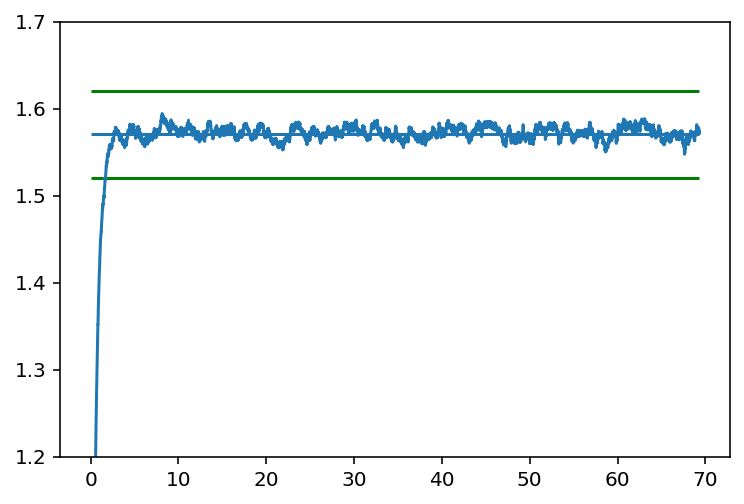

In [394]:
epsilon_mean = 0.05
plt.plot(t_a, theta_mean_t)
plt.hlines(np.pi/2,0,t_a[-1])
plt.hlines(np.pi/2 + epsilon_mean,0,t_a[-1], color='g')
plt.hlines(np.pi/2 - epsilon_mean,0,t_a[-1], color='g')
plt.ylim(1.2,1.7)

(0.3, 0.5)

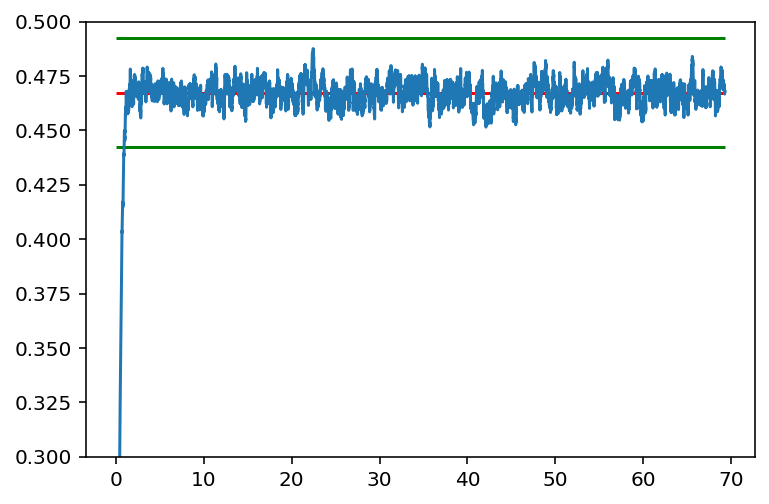

In [395]:
epsilon_var = .025
plt.plot(t_a, theta_var_t)
plt.hlines(np.pi**2/4 - 2,0,t_a[-1], color='r')
plt.hlines(np.pi**2/4 - 2 + epsilon_var,0,t_a[-1], color='g')
plt.hlines(np.pi**2/4 - 2 - epsilon_var,0,t_a[-1], color='g')
#plt.hlines(np.pi**2/4 - 2 + error_var,0,70, color='g')
#plt.hlines(np.pi**2/4 - 2 - error_var,0,70, color='g')
plt.ylim(.3,.5)

In [151]:
def autocorr(l_pos_t):
    """This function returns the autocorrelation function of the position vector with configuration space 
    S2 as a function of time, given a list of position vactors l_pos_t"""

    autocorr = []
    
    for l_pos in l_pos_t:
        thetas = []
        
        for pos in l_pos:
            r, theta, phi = trans_c_s(pos[0],pos[1],pos[2])
            thetas.append(np.cos(theta))
            

        autocorr.append(thetas)
    autocorr = np.array(autocorr)
    return autocorr.mean(axis=1)


In [396]:
autocorr_t = autocorr(l_pos_t)

(-0.05, 0.2)

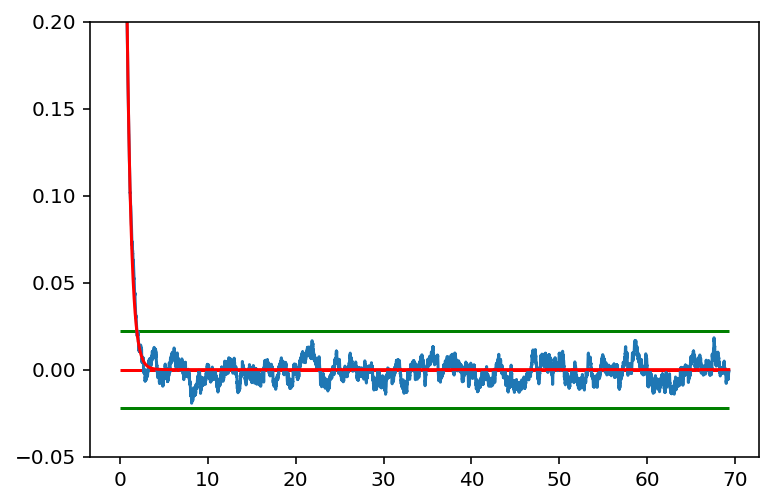

In [404]:
epsilon_autocorr = 0.022
plt.plot(t_a, autocorr_t)
plt.plot(t_a, np.exp(- 2*t_a), color='r')
plt.hlines(0,0,t_a[-1], color='r')
plt.hlines(  epsilon_autocorr,0,t_a[-1], color='g')
plt.hlines( - epsilon_autocorr,0,t_a[-1], color='g')
plt.ylim(-0.05,.2)

## Function definition for error estimation

\begin{align}
\overline{f(t)} = \frac{1}{\tau} \int_{t_{min}}^{t_{min} + \tau} f (\xi)\, d \xi = \frac{1}{m} \sum_{k=1}^{m} f(t_{k})
\end{align}
Where
\begin{align}
t_{min} = \min{\left \{ t \in [0,T] | f(t) = \langle f \rangle \right \}}
\end{align}
and $\tau = [t_{min}, T]$, where $T = \mbox{MC_steps} \times dt$

Non-equilibrium time average with respect the equilibrium average
\begin{align}
\overline{\Delta f(t)} = f(t) - \langle f \rangle
\end{align}


 - We need a function that determines the index in which for the first time we hit the stationary value
 - Given this index we can now proceed to calculate the mean absolute error in all the time steps


In [170]:
def find_index_autocorr(auto_t):
    for i in range(auto_t.shape[0]):
        if auto_t[i] <= 0.:
            return i

In [171]:
index_a = find_index_autocorr(autocorr_t)

In [172]:
index_a

386

In [175]:
def mean_abs_errr_auto(auto_t):
    idx = find_index_autocorr(auto_t)
    abs_auto_t = abs(auto_t[idx:])
    return abs_auto_t.mean()

In [405]:
error_auto = mean_abs_errr_auto(autocorr_t)

In [406]:
error_auto

0.004833763777039824

In [188]:
def find_index_mean(mean_t):
    for i in range(mean_t.shape[0]):
        if mean_t[i] >= np.pi/2:
            return i

In [240]:
def mean_abs_err_mean(mean_t):
    idx = find_index_mean(mean_t)
    abs_mean_e_t = abs(mean_t[idx:] - np.pi/2*np.ones(mean_t[idx:].shape[0]))
    return abs_mean_e_t.mean()

In [400]:
error_mean = mean_abs_err_mean(theta_mean_t)

In [401]:
error_mean

0.005765986577103987

In [199]:
def find_index_var(var_t):
    for i in range(var_t.shape[0]):
        if var_t[i] >= (np.pi**2/4 - 2):
            return i

In [244]:
def mean_abs_err_var(var_t):
    idx = find_index_var(var_t)
    abs_var_e_t = abs(var_t[idx:] - (np.pi**2/4 - 2) * np.ones(var_t[idx:].shape[0]))
    return abs_var_e_t.mean()

In [402]:
error_var = mean_abs_err_var(theta_var_t)

In [403]:
error_var

0.00401587428185006